#**Step1: Import Library**

In [1]:
import numpy as np
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


#**Step2: Reading File**

In [3]:
df1 = pd.read_csv("/gdrive/MyDrive/IS403/Houseprice.csv")
df2 = pd.read_csv("/gdrive/MyDrive/IS403/Houseprice2.csv")

In [4]:
df_org = pd.concat([df1,df2])
df_org.head()

,Quận,Loại_BDS,Pháp_lý,Số_tầng,Số_phòng,Diện_tích,Dài,Rộng,Giá
0,Huyện Bình Chánh,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,1,4,100 m2,20m,5m,"1,2 tỷ"
1,Huyện Củ Chi,"Đất thổ cư, đất ở",Sổ hồng/ Sổ đỏ,---,---,3.100 m2,50m,30m,"2,5 triệu / m2"
2,Huyện Củ Chi,"Đất thổ cư, đất ở",Sổ hồng/ Sổ đỏ,---,---,5.002 m2,205m,45m,"12,75 tỷ"
3,Huyện Củ Chi,"Đất thổ cư, đất ở",---,---,---,4.147 m2,---,---,"6,39 tỷ"
4,Huyện Củ Chi,"Đất thổ cư, đất ở",Sổ hồng/ Sổ đỏ,---,---,1.635 m2,82m,20m,9 tỷ


In [5]:
df = df_org.copy()

In [6]:
df[df == "---"] = np.nan

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quận       20000 non-null  object
 1   Loại_BDS   20000 non-null  object
 2   Pháp_lý    14109 non-null  object
 3   Số_tầng    17092 non-null  object
 4   Số_phòng   17079 non-null  object
 5   Diện_tích  20000 non-null  object
 6   Dài        16847 non-null  object
 7   Rộng       17485 non-null  object
 8   Giá        20000 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


##**Let's do some statistics**

In [8]:
df.describe()

,Quận,Loại_BDS,Pháp_lý,Số_tầng,Số_phòng,Diện_tích,Dài,Rộng,Giá
count,20000,20000,14109,17092,17079,20000,16847,17485,20000
unique,45,14,4,37,73,740,330,281,1159
top,Quận Gò Vấp,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,2,4,100 m2,20m,4m,25 tỷ
freq,2891,8409,13780,3849,3923,948,2097,4039,211


In [9]:
df.head()

,Quận,Loại_BDS,Pháp_lý,Số_tầng,Số_phòng,Diện_tích,Dài,Rộng,Giá
0,Huyện Bình Chánh,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,1,4,100 m2,20m,5m,"1,2 tỷ"
1,Huyện Củ Chi,"Đất thổ cư, đất ở",Sổ hồng/ Sổ đỏ,NaN,NaN,3.100 m2,50m,30m,"2,5 triệu / m2"
2,Huyện Củ Chi,"Đất thổ cư, đất ở",Sổ hồng/ Sổ đỏ,NaN,NaN,5.002 m2,205m,45m,"12,75 tỷ"
3,Huyện Củ Chi,"Đất thổ cư, đất ở",NaN,NaN,NaN,4.147 m2,NaN,NaN,"6,39 tỷ"
4,Huyện Củ Chi,"Đất thổ cư, đất ở",Sổ hồng/ Sổ đỏ,NaN,NaN,1.635 m2,82m,20m,9 tỷ


#**Step3: Cleaning data**

In [10]:
df_renamed = df.rename(columns = {"Quận":"district", 
                                  "Loại_BDS":"type_of_housing",
                                 "Pháp_lý":"legal_paper",
                                  "Số_tầng":"num_floors",
                                 "Số_phòng":"num_bed_rooms",
                                  "Diện_tích":"squared_meter_area",
                                 "Dài":"length_meter", "Rộng":"width_meter", "Giá":"price"})
df_renamed['legal_paper'] = df_renamed['legal_paper'].fillna('Không có giấy')
df_renamed = df_renamed.dropna()
df_renamed = df_renamed.reset_index()

# The length of the dataset after dropping null values
print("The length of the dataset after dropping null values is", str(len(df_renamed)), "rows.")

The length of the dataset after dropping null values is 14099 rows.


In [11]:
df_renamed.head()

,index,district,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price
0,0,Huyện Bình Chánh,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,1,4,100 m2,20m,5m,"1,2 tỷ"
1,6,Thành phố Thủ Đức,Nhà mặt tiền,Không có giấy,3,4,55 m2,11m,5m,7 tỷ
2,8,Thành phố Thủ Đức,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4,4,72 m2,14m,5m,"9,2 tỷ"
3,11,Thành phố Thủ Đức,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,3,3,73 m2,12m,"6,6m","4,99 tỷ"
4,14,Huyện Bình Chánh,Nhà mặt tiền,Không có giấy,1,4,100 m2,20m,5m,1 tỷ


##**Cleaning data in each column**

In [12]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14099 entries, 0 to 14098
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               14099 non-null  int64 
 1   district            14099 non-null  object
 2   type_of_housing     14099 non-null  object
 3   legal_paper         14099 non-null  object
 4   num_floors          14099 non-null  object
 5   num_bed_rooms       14099 non-null  object
 6   squared_meter_area  14099 non-null  object
 7   length_meter        14099 non-null  object
 8   width_meter         14099 non-null  object
 9   price               14099 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [13]:
df_renamed.head()

,index,district,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price
0,0,Huyện Bình Chánh,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,1,4,100 m2,20m,5m,"1,2 tỷ"
1,6,Thành phố Thủ Đức,Nhà mặt tiền,Không có giấy,3,4,55 m2,11m,5m,7 tỷ
2,8,Thành phố Thủ Đức,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4,4,72 m2,14m,5m,"9,2 tỷ"
3,11,Thành phố Thủ Đức,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,3,3,73 m2,12m,"6,6m","4,99 tỷ"
4,14,Huyện Bình Chánh,Nhà mặt tiền,Không có giấy,1,4,100 m2,20m,5m,1 tỷ


###**District**

In [14]:
df_renamed['district'] = df_renamed['district'].str.replace('Phước bình ', '').str.strip()
df_renamed['district'] = df_renamed['district'].str.replace('Thân Văn Nhiếp ', '').str.strip()
df_renamed['district'] = df_renamed['district'].str.replace('Đường số 5 ', '').str.strip()

###**Num_floors**

In [15]:
df_renamed['num_floors'] = df_renamed['num_floors'].astype(int)

###**Num_beds**

In [16]:
df_renamed['num_bed_rooms'] = df_renamed['num_bed_rooms'].astype(int)

###**Square_meter_area**

In [17]:
df_renamed['squared_meter_area'] = df_renamed['squared_meter_area'].str.replace(' m2','').str.strip().astype(float)

###**Length**

In [18]:
df_renamed['length_meter'] = df_renamed['length_meter'].str.replace('m','').str.strip()

In [19]:
df_renamed['length_meter'] = df_renamed['length_meter'].str.replace(',','.').str.strip()

In [20]:
list_erro = ['E p', '16+', '18..4', '0', '12..5', '17 5']

In [21]:
for i in list_erro:
  df_renamed.drop(df_renamed[df_renamed['length_meter'] == i ].index, inplace=True)

In [22]:
df_renamed['length_meter']  = df_renamed['length_meter'].astype(float)

###**Width**

In [23]:
df_renamed['width_meter'] = df_renamed['width_meter'].str.replace(',','.').str.strip()

In [24]:
df_renamed['width_meter'] = df_renamed['width_meter'].str.replace('m','').str.strip()

In [25]:
list_erro1 = ['4(nh L8)', '4.5(nh6)', '4.2(nhà.', '4/4.6', '6.6/7.3', '4/12', '7/10', '4.1/8', '3.1/4', '6/7.5', '4 2', '.6.6', '4.2/8', '05']

In [26]:
for i in list_erro1:
  df_renamed.drop(df_renamed[df_renamed['width_meter'] == i ].index, inplace=True)

In [27]:
df_renamed['width_meter'] = df_renamed['width_meter'].astype(float)

###**Price_in_million**

In [28]:
df_renamed['price'] = df_renamed['price'].str.replace(',','.').str.strip()

In [29]:
df_renamed = df_renamed[df_renamed["price"].str.contains("/\xa0m2\xa0\xa0")==False]

In [30]:
df_renamed = df_renamed[df_renamed["price"].str.contains("/\xa0m2")==False]

In [31]:
error_list3 = ['999.999 tỷ', '25 tỷ 68 ngàn', 'Thỏa thuận', '49 ngàn', '14 ngàn']

In [32]:
for i in error_list3:
  df_renamed.drop(df_renamed[df_renamed['price'] == i ].index, inplace=True)

In [33]:
# Clean and convert all prices to million/m2 instead of VND/m2 or billion/m2
df_renamed.loc[df_renamed['price'].str.contains('tỷ'), 'price'] = df_renamed.loc[df_renamed['price'].str.contains('tỷ'), 'price'].str.replace('tỷ','').astype(float) * 1000
df_renamed.loc[df_renamed['price'].str.contains('triệu', na=False), 'price'] = df_renamed.loc[df_renamed['price'].str.contains('triệu', na=False), 'price'].str.replace('triệu','').astype(float)

In [34]:
df_renamed['price'] = df_renamed['price'].astype(float)

In [35]:
df_renamed.head()

,index,district,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price
0,0,Huyện Bình Chánh,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,1,4,100.0,20.0,5.0,1200.0
1,6,Thành phố Thủ Đức,Nhà mặt tiền,Không có giấy,3,4,55.0,11.0,5.0,7000.0
2,8,Thành phố Thủ Đức,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4,4,72.0,14.0,5.0,9200.0
3,11,Thành phố Thủ Đức,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,3,3,73.0,12.0,6.6,4990.0
4,14,Huyện Bình Chánh,Nhà mặt tiền,Không có giấy,1,4,100.0,20.0,5.0,1000.0


In [36]:
df_renamed.drop('index',axis=1, inplace=True)

In [37]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13951 entries, 0 to 14098
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   district            13951 non-null  object 
 1   type_of_housing     13951 non-null  object 
 2   legal_paper         13951 non-null  object 
 3   num_floors          13951 non-null  int64  
 4   num_bed_rooms       13951 non-null  int64  
 5   squared_meter_area  13951 non-null  float64
 6   length_meter        13951 non-null  float64
 7   width_meter         13951 non-null  float64
 8   price               13951 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.1+ MB


# **Step 4: Checking For Categorical**

In [38]:
for col in df_renamed.columns:
    print()
    if df_renamed[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df_renamed[col].unique()}')


Name of Column is: district and unique values are: ['Huyện Bình Chánh' 'Thành phố Thủ Đức' 'Quận Tân Phú' 'Quận Bình Thạnh'
 'Quận 12' 'Quận Bình Tân' 'Quận 1' 'Quận Gò Vấp' 'Quận 10' 'Quận 9'
 'Quận 7' 'Quận Tân Bình' 'Quận 8' 'Quận 3' 'Huyện Hóc Môn'
 'Quận Phú Nhuận' 'Quận 4' 'Quận 11' 'Quận 6' 'Quận 2' 'Huyện Nhà Bè'
 'Huyện Củ Chi' 'Quận 5']

Name of Column is: type_of_housing and unique values are: ['Nhà mặt tiền' 'Nhà trong hẻm' 'Căn hộ chung cư' 'Biệt thự, nhà liền kề'
 'Nhà hàng, khách sạn' 'Phòng trọ, nhà trọ' 'Đất thổ cư, đất ở'
 'Văn phòng' 'Kho, xưởng' 'Đất nền, liền kề, đất dự án' 'Mặt bằng'
 'Shop, kiot, quán']

Name of Column is: legal_paper and unique values are: ['Sổ hồng/ Sổ đỏ' 'Không có giấy' 'Giấy tờ hợp lệ' 'Giấy phép KD']








#**Step 5: Data PreProcessing And Visualizations**

In [39]:
#this function returns categorical variables
def return_categorical(df):
  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

#this function returns numerical variables
def return_numerical(df):
  return list(set(df.columns) - set(return_categorical(df)))

def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))
  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):
    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');

##**Checking Distribution For Continuous Variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

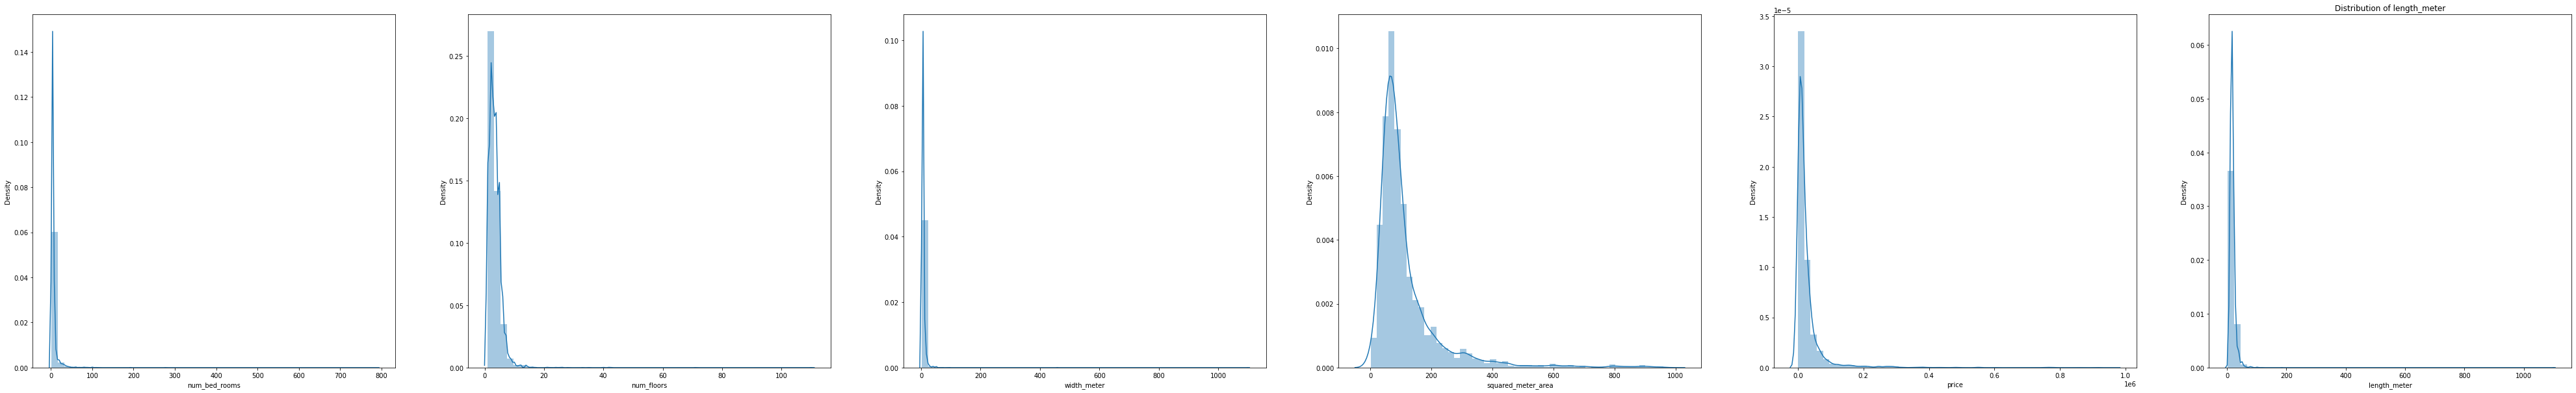

In [40]:
check_normal(df_renamed)

##**Plots For Categorical Variables**

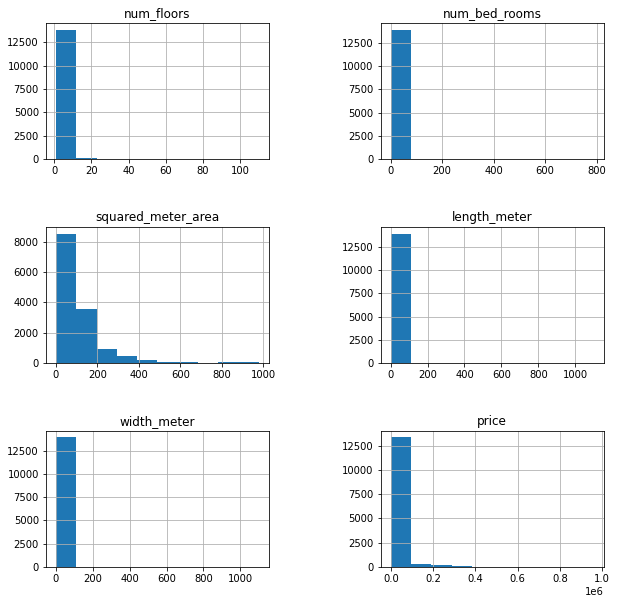

In [41]:
header = ['num_floors','num_bed_rooms', 'squared_meter_area', 'length_meter', 'width_meter','price']
df_renamed.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

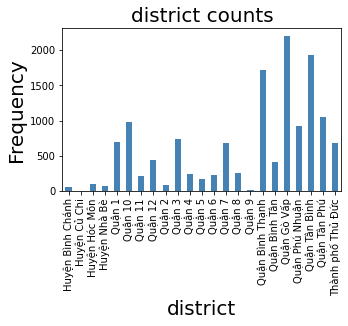

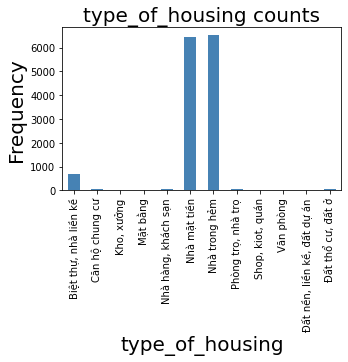

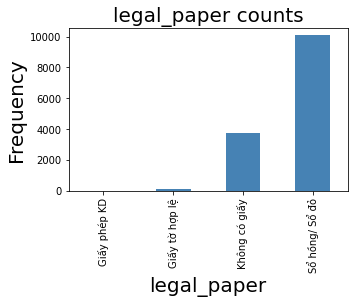

In [42]:
# plotting graphs for all categorical columns
for col in return_categorical(df_renamed):
    counts = df_renamed[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(5, 3))
    else:
      fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts',fontsize=20)
    ax.set_xlabel(col, fontsize=20) 
    ax.set_ylabel("Frequency", fontsize=20)
plt.show()

=> Dữ liệu ở những Quận này khá ít, không đủ tin cậy để huấn luyện, nên nhóm tiến hành drop bỏ để tránh những trường hợp dự đoán sai lệch

In [43]:
l = df_renamed['district'].unique()
for i in l:
  print(i)
  print(df_renamed['district'][df_renamed['district'] == i].count())

Huyện Bình Chánh
55
Thành phố Thủ Đức
683
Quận Tân Phú
1050
Quận Bình Thạnh
1725
Quận 12
448
Quận Bình Tân
409
Quận 1
699
Quận Gò Vấp
2203
Quận 10
978
Quận 9
16
Quận 7
679
Quận Tân Bình
1931
Quận 8
257
Quận 3
741
Huyện Hóc Môn
105
Quận Phú Nhuận
927
Quận 4
249
Quận 11
215
Quận 6
228
Quận 2
90
Huyện Nhà Bè
78
Huyện Củ Chi
9
Quận 5
176


In [44]:
#df_renamed.drop(df_renamed[df_renamed['district'] == 'Quận 9'].index, inplace = True)

In [45]:
#df_renamed.drop(df_renamed[df_renamed['district'] == 'Huyện Củ Chi'].index, inplace = True)

In [46]:
l = df_renamed['type_of_housing'].unique()
for i in l:
  print(i)
  print(df_renamed['district'][df_renamed['type_of_housing'] == i].count())

Nhà mặt tiền
6447
Nhà trong hẻm
6525
Căn hộ chung cư
58
Biệt thự, nhà liền kề
674
Nhà hàng, khách sạn
74
Phòng trọ, nhà trọ
58
Đất thổ cư, đất ở
54
Văn phòng
29
Kho, xưởng
26
Đất nền, liền kề, đất dự án
3
Mặt bằng
1
Shop, kiot, quán
2


In [47]:
df_renamed.drop(df_renamed[df_renamed['type_of_housing'] == 'Mặt bằng'].index, inplace = True)

In [48]:
df_renamed.drop(df_renamed[df_renamed['type_of_housing'] == 'Shop, kiot, quán'].index, inplace = True)

In [49]:
df_renamed.drop(df_renamed[df_renamed['type_of_housing'] == 'Đất nền, liền kề, đất dự án'].index, inplace = True)

In [50]:
#df_renamed.drop(df_renamed[df_renamed['type_of_housing'] == 'Kho, xưởng'].index, inplace = True)

In [51]:
#df_renamed.drop(df_renamed[df_renamed['type_of_housing'] == 'Văn phòng'].index, inplace = True)

In [52]:
#df_renamed.drop(df_renamed[df_renamed['type_of_housing'] == 'Đất thổ cư, đất ở'].index, inplace = True)

In [53]:
#df_renamed.drop(df_renamed[df_renamed['type_of_housing'] == 'Phòng trọ, nhà trọ'].index, inplace = True)

In [54]:
#df_renamed.drop(df_renamed[df_renamed['type_of_housing'] == 'Căn hộ chung cư'].index, inplace = True)

In [55]:
#df_renamed.drop(df_renamed[df_renamed['type_of_housing'] == 'Nhà hàng, khách sạn'].index, inplace = True)

In [56]:
l = df_renamed['legal_paper'].unique()
for i in l:
  print(i)
  print(df_renamed['district'][df_renamed['legal_paper'] == i].count())

Sổ hồng/ Sổ đỏ
10060
Không có giấy
3749
Giấy tờ hợp lệ
135
Giấy phép KD
1


In [57]:
df_renamed.drop(df_renamed[df_renamed['legal_paper'] == 'Giấy phép KD'].index, inplace = True)

##**Checking For Highly Correlated Columns**

In [58]:
corr = df_renamed.corr()
corr_greater_than_75 = corr[corr>=.75]
#corr_greater_than_75 = corr
corr_greater_than_75 

,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price
num_floors,1.0,NaN,NaN,NaN,NaN,NaN
num_bed_rooms,NaN,1.0,NaN,NaN,NaN,NaN
squared_meter_area,NaN,NaN,1.0,NaN,NaN,NaN
length_meter,NaN,NaN,NaN,1.0,NaN,NaN
width_meter,NaN,NaN,NaN,NaN,1.0,NaN
price,NaN,NaN,NaN,NaN,NaN,1.0


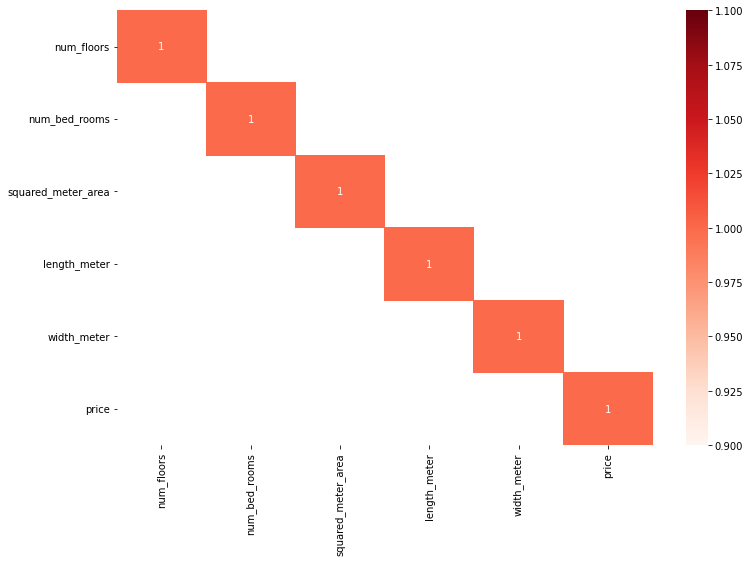

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);

##**Removing outliers using IQR method**

In [60]:
def remove_outlier_IQR(df, series):
    Q1=df[series].quantile(0.25)
    Q3=df[series].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[series]<(Q1-1.5*IQR)) | (df[series]>(Q3+1.5*IQR)))]
    return df_final

removed_outliers = df_renamed
columns_to_remove_outliers = ['num_floors', 'num_bed_rooms', 'squared_meter_area', 'length_meter',
                              'width_meter', 'price']
for column in columns_to_remove_outliers:
    removed_outliers = remove_outlier_IQR(removed_outliers, column)
    
print("The final length of the dataset is", str(len(removed_outliers)), "rows.")

The final length of the dataset is 9400 rows.


In [61]:
removed_outliers

,district,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price
0,Huyện Bình Chánh,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,1,4,100.0,20.0,5.0,1200.0
1,Thành phố Thủ Đức,Nhà mặt tiền,Không có giấy,3,4,55.0,11.0,5.0,7000.0
2,Thành phố Thủ Đức,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4,4,72.0,14.0,5.0,9200.0
3,Thành phố Thủ Đức,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,3,3,73.0,12.0,6.6,4990.0
4,Huyện Bình Chánh,Nhà mặt tiền,Không có giấy,1,4,100.0,20.0,5.0,1000.0
...,...,...,...,...,...,...,...,...,...
14093,Quận 10,Nhà trong hẻm,Không có giấy,5,10,80.0,18.0,5.5,16000.0
14094,Quận 10,Nhà trong hẻm,Không có giấy,1,1,110.0,24.0,5.0,25000.0
14096,Quận Phú Nhuận,Nhà mặt tiền,Không có giấy,6,10,90.0,23.0,4.0,26800.0
14097,Quận Phú Nhuận,Nhà trong hẻm,Không có giấy,2,3,80.0,16.0,6.0,18000.0


In [62]:
removed_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9400 entries, 0 to 14098
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   district            9400 non-null   object 
 1   type_of_housing     9400 non-null   object 
 2   legal_paper         9400 non-null   object 
 3   num_floors          9400 non-null   int64  
 4   num_bed_rooms       9400 non-null   int64  
 5   squared_meter_area  9400 non-null   float64
 6   length_meter        9400 non-null   float64
 7   width_meter         9400 non-null   float64
 8   price               9400 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 734.4+ KB


#**Step6: Building Model**

In [63]:
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [64]:
housing = removed_outliers

# Separate predictors and response (price) variables
X = housing.loc[:, housing.columns != 'price']
y = housing[['price']]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=True)

In [66]:
X_train.shape, y_train.shape

((8460, 8), (8460, 1))

In [67]:
X_test.shape, y_test.shape

((940, 8), (940, 1))

###**Class Training Model**

In [68]:
import xgboost

In [69]:
class TrainModel:
  """
    Class TrainModel dùng để xây dựng model dự đoán với input là tập dữ liệu đã chia 
    và các model bao gồm RandomForest, Linear Regression, Support Vector Regressor, Decision Tree
    Output là model và score(độ chính xác của model).  
    Class Trainmodel gồm các hàm thành phần:
        + Hàm __init__(): 
              -- contructor khởi tạo các mô hình định (RF, LR, SVR, DT); 
              -- các param mẫu (param_RF) cho việc thực hiện Gridsearch;
              -- column_trans: encode label trong các cột
              -- scaler: chuẩn hóa dữ liệu với Standard Scaler
              -- X_train, X_test, y_train, y_test: các trường dữ liệu phân chia trước khi vào huấn luyện
        + Hàm makepipe(): tạo hệ thống pipe xử lý song song việc encol label model và train model
        + Hàm RandomForest(): xây dựng mô hình hồi quy RandomForest
        + Hàm LinearReg(): xây dựng mô hình hồi quy LinearRegression
        + Hàm SupportVectorReg(): xây dựng mô hình hồi quy SVR
        + Hàm DecisionTree(): xây dựng mô hình hồi quy DT
        + Hàm GridSearch(): dùng công cụ hộ trợ sklearn.GridSearchCV() tuning cho mô hình với tập param mẫu trên toàn bộ dữ liệu train, tìm ra param tốt nhất cho mô hình (best_param_) và score(best_score).

  """
  def __init__(self,X_train, X_test, y_train, y_test):
    self.RF = RandomForestRegressor()
    self.LR =  LinearRegression()
    self.SVR = SVR(C=5000.0, epsilon=1)
    self.DT = DecisionTreeRegressor()
    self.xgboost = xgboost.XGBRegressor()
    # param mẫu RandomForest cho GridSearch() 
    self.param_RF = {'n_estimators': [397,398,399,400,401,402],
               'max_features': ['sqrt'],
               'max_depth': [38,39,40,41,42],
               'min_samples_split': [1,2],
               'min_samples_leaf': [1,2]}

    self.param_DT = {
        'criterion' : ['squared_error' , 'friedman_mse', 'absolute_error', 'poisson'],
        'min_samples_split': [1,2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

    #encoder label 
    self.column_trans = make_column_transformer((OneHotEncoder(sparse=False),['district']),
                                       (OneHotEncoder(sparse=False),['type_of_housing']),
                                       (OneHotEncoder(sparse=False),['legal_paper']),
                                       remainder='passthrough')
    self.scaler = StandardScaler()
    self.X_train = X_train 
    self.X_test = X_test
    self.y_train = y_train
    self.y_test= y_test

  def makepipe(self,model):
    pipe = make_pipeline(self.column_trans,self.scaler,model)
    return pipe
  def RandomForest(self):
    pipe = self.makepipe(self.RF)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test)  
    return pipe,r2_score(self.y_test,y_predict)
  def LinearReg(self):
    pipe = self.makepipe(self.LR)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test)  
    return pipe,r2_score(self.y_test,y_predict)
  def SupportVectorReg(self):
    pipe = self.makepipe(self.SVR)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test)  
    return pipe,r2_score(self.y_test,y_predict)
  def DecisionTree(self):
    pipe = self.makepipe(self.DT)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test)  
    return pipe,r2_score(self.y_test,y_predict)
  def Xgboost(self):
    pipe = self.makepipe(self.xgboost)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test)  
    return pipe, r2_score(self.y_test,y_predict)
    
  def GridSearch(self, name):
    if name == 'Random Forest':
      Grid = self.makepipe(GridSearchCV(estimator=self.RF, param_grid=self.param_RF, 
                              cv=3, verbose=0))
      Grid_search = Grid.fit(self.X_train, np.array(self.y_train).ravel())
    elif name == 'Decision Tree':
      Grid = self.makepipe(GridSearchCV(estimator=self.DT, param_grid=self.param_DT, 
                              cv=3, verbose=0))
      Grid_search = Grid.fit(self.X_train, np.array(self.y_train).ravel())
      
    model = self.makepipe(Grid_search[2].best_estimator_).fit(self.X_train, np.array(self.y_train).ravel())
    y_predict = model.predict(self.X_test)
    return Grid_search, model, r2_score(self.y_test,y_predict)
    

###**Modeling**

In [70]:
model = TrainModel(X_train, X_test, y_train, y_test)

In [71]:
model.X_train

,district,type_of_housing,legal_paper,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter
8998,Quận 11,Nhà trong hẻm,Không có giấy,2,2,60.0,15.0,4.0
3673,Quận 10,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,1,2,100.0,20.0,5.0
10667,Quận Tân Bình,Nhà mặt tiền,Không có giấy,3,4,80.0,20.0,4.0
5279,Quận Bình Thạnh,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,2,2,80.0,11.0,4.5
10938,Quận Tân Phú,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5,4,114.0,17.5,6.0
...,...,...,...,...,...,...,...,...
4314,Quận Gò Vấp,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,2,2,60.0,15.0,4.0
11284,Quận 10,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,3,4,100.0,9.0,4.0
1366,Quận Bình Tân,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,1,2,48.0,12.0,4.0
7623,Quận 10,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,1,3,50.0,15.0,3.5


####**Random Forest**

In [72]:
pipe_RF,score = model.RandomForest()

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [73]:
score

0.9173561557314539

####**Linear Regession**

In [74]:
pipe_LR,score = model.LinearReg()

In [75]:
score

0.7015497453109103

####**Support Vector Regressor**

In [76]:
pipe_SVR,score = model.SupportVectorReg()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
score

0.7989445022977095

####**Decision Tree**

In [78]:
pipe_DT,score = model.DecisionTree()

In [79]:
score

0.8524391662589703

####**Xgboost**

In [80]:
#pipe_DT,score = model.Xgboost()

In [81]:
#score

###**Find Best Model with Grid Search**

In [82]:
Grid_search_RF, pipe_RF, score = model.GridSearch("Random Forest")
score

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

0.9208862794554074

In [83]:
Grid_search_RF[2].best_params_

{'max_depth': 38,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 397}

##**Cross Validation**

In [84]:
pipe_RF

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(sparse=False),
                                                  ['district']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(sparse=False),
                                                  ['type_of_housing']),
                                                 ('onehotencoder-3',
                                                  OneHotEncoder(sparse=False),
                                                  ['legal_paper'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=38, max_features='sqrt',
                                       n_estimators=397))])

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [86]:
kf = KFold(n_splits=10, shuffle = True, random_state=True)
scores = cross_val_score(pipe_RF, X, np.array(y).ravel(), cv=kf)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/usr/l

In [87]:
scores

array([0.91990687, 0.92605471, 0.90883572, 0.90172215, 0.9014669 ,
       0.90377486,        nan, 0.92039037, 0.91861505, 0.91602534])

##**Save best model**

In [88]:
import pickle
#save the model to disk
filename = 'finalized_model2.sav'
pickle.dump(pipe_RF, open(filename, 'wb'))